In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score , classification_report,confusion_matrix

In [14]:
titanic = pd.read_csv(r"C:\Users\Asus\Downloads\Titanic-Dataset.csv")
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [15]:
titanic.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [16]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Check missing value

In [17]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

####  Missing values were found in Age, Cabin, and Embarked columns

## fill missing value

In [18]:
titanic['Age'].fillna(titanic['Age'].median(), inplace=True)
titanic['Embarked'].fillna(titanic['Embarked'].mode()[0], inplace=True)
titanic.drop(columns=['Cabin'], inplace=True)  # Drop cabin due to too many missing values


In [19]:
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

## Remove unnecessary columns

In [21]:
titanic.drop(columns=['Name', 'Ticket', 'PassengerId'], inplace=True)


* Name, Ticket, and PassengerId were dropped as they are not useful for prediction.

## outlier and treatment of outlier

<Axes: >

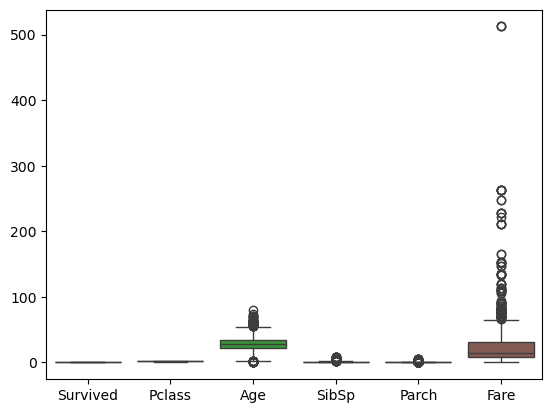

In [22]:
sns.boxplot(data = titanic)

## treatment of outlier

In [25]:
for i in titanic:
    if titanic[i].dtypes in ("float64","int64"):
        q1 = titanic[i].quantile(0.25)  
        q3 = titanic[i].quantile(0.75)  
        iqr = q3-q1 
        ul = q3 + 1.5*iqr 
        ll = q1 - 1.5*iqr 
        titanic[i].clip(lower=ll,upper=ul,inplace=True)
    

<Axes: >

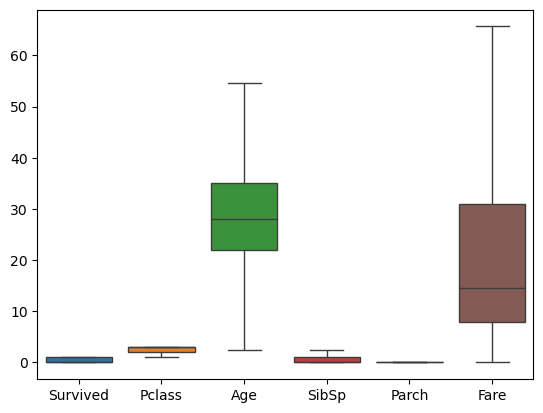

In [27]:
sns.boxplot(data = titanic)

In [28]:
## Data Visualization

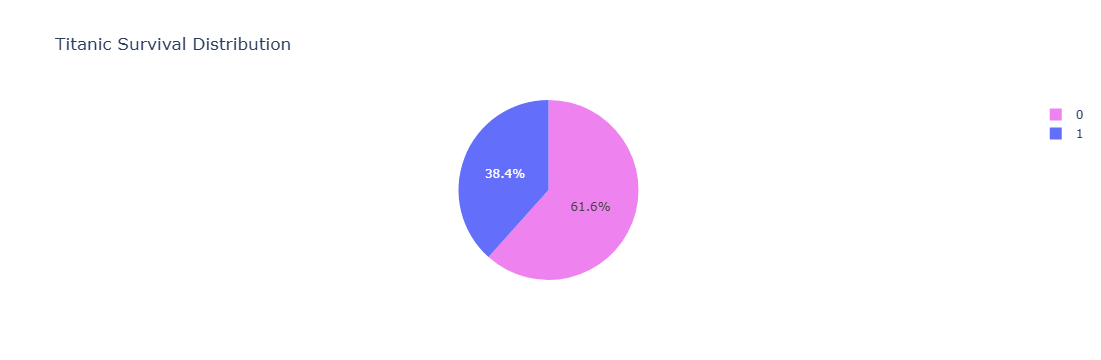

In [30]:
import plotly.express as px

fig = px.pie(titanic,names='Survived',color='Survived',
             color_discrete_map={0:'violet',
                                 1:'light-pink'},
            title="Titanic Survival Distribution")
fig.show()

# Labeling the data

In [31]:
titanic_number = titanic.select_dtypes(include=[np.number])
titanic_number.head(3)

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1.0,0,7.2500
1,1,1,38.0,1.0,0,65.6344
2,1,3,26.0,0.0,0,7.9250


In [32]:
titanic_dummies = titanic.select_dtypes(include=['object'])
titanic_dummies.head(3)

,Sex,Embarked
0,male,S
1,female,C
2,female,S


In [34]:
from sklearn.preprocessing import LabelEncoder
titanic_dummies = titanic_dummies.apply(LabelEncoder().fit_transform)
titanic_dummies.head(3)

,Sex,Embarked
0,1,2
1,0,0
2,0,2


In [35]:
titanic = pd.concat([titanic_number, titanic_dummies],axis=1)
titanic.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex,Embarked
0,0,3,22.0,1.0,0,7.2500,1,2
1,1,1,38.0,1.0,0,65.6344,0,0
2,1,3,26.0,0.0,0,7.9250,0,2
3,1,1,35.0,1.0,0,53.1000,0,2
4,0,3,35.0,0.0,0,8.0500,1,2


# Data Partition

In [37]:
from sklearn.model_selection import train_test_split

X = titanic.drop('Survived', axis = 1)
Y = titanic[['Survived']]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=1234)

# Model Random Forest

In [39]:
from sklearn.ensemble import RandomForestRegressor  # y = Number
from sklearn.ensemble import RandomForestClassifier # y = Category

# by default 100 tree will be form 
RFModel = RandomForestClassifier(random_state=20,
                               n_estimators=25, # make 25 tress
                               criterion="gini",
                               max_depth=4,  # each tree will have 4 branches
                               min_samples_split=250,# each tree will have parent node
                               min_samples_leaf=50,# each tree will have Child node
                               max_features="sqrt")# Variable selection in each tree  

RFModel.fit(X_train, y_train)

RandomForestClassifier(max_depth=4, min_samples_leaf=50, min_samples_split=250,
                       n_estimators=25, random_state=20)

# Importance Feature

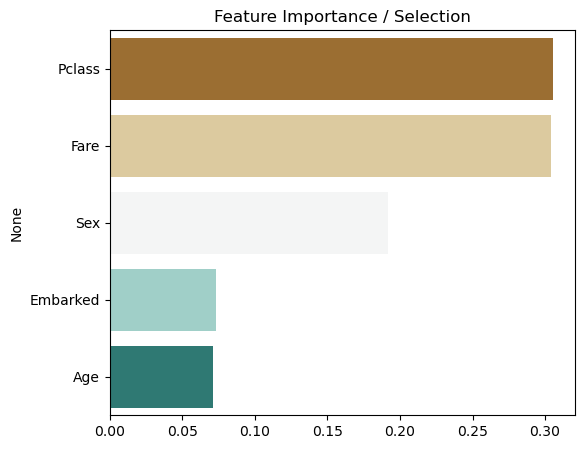

In [40]:
imp = pd.Series(data=RFModel.feature_importances_, index=RFModel.feature_names_in_).sort_values(ascending=False)
plt.figure(figsize=(6,5))
plt.title("Feature Importance / Selection")
ax = sns.barplot(y=imp.head().index, x=imp.head().values, palette="BrBG")

## Top 5 Variable
* PClass
* Fare
* Sex
* Embarked
* Age



# Random Forest Visualization

In [41]:
!pip install pydot

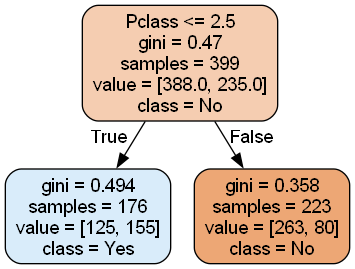

In [42]:
from sklearn.tree import export_graphviz
import pydot

tree = RFModel.estimators_[4]  # 0-24 specify the tree number   

export_graphviz(tree, out_file = 'abc.dot', 
                feature_names = list(X.columns),  # all independent variable name
                class_names = ['No','Yes'] ,
                rounded = True, 
                filled=True)
(graph, ) = pydot.graph_from_dot_file('abc.dot')
graph.write_png('tree.png')


from IPython.display import Image
Image(filename = 'tree.png')

# Prediction on train Dataset

In [43]:
train = pd.concat([X_train,y_train],axis=1)
train.head()

,Pclass,Age,SibSp,Parch,Fare,Sex,Embarked,Survived
28,3,28.0,0.0,0,7.8792,0,1,1
270,1,28.0,0.0,0,31.0000,1,2,0
744,3,31.0,0.0,0,7.9250,1,2,1
73,3,26.0,1.0,0,14.4542,1,0,0
423,3,28.0,1.0,0,14.4000,0,2,0


In [44]:
train['Predicted'] = RFModel.predict(X_train)
train.head()

,Pclass,Age,SibSp,Parch,Fare,Sex,Embarked,Survived,Predicted
28,3,28.0,0.0,0,7.8792,0,1,1,0
270,1,28.0,0.0,0,31.0000,1,2,0,0
744,3,31.0,0.0,0,7.9250,1,2,1,0
73,3,26.0,1.0,0,14.4542,1,0,0,0
423,3,28.0,1.0,0,14.4000,0,2,0,0


# Model Performance Metrics

In [46]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(train['Predicted'],train['Survived'])
print(confusion_matrix)

[[358 126]
 [ 25 114]]


In [47]:
Accuracy_Train = ((3388+556)/(4930)*100)
print(Accuracy_Train)

80.0


In [48]:
from sklearn.metrics import classification_report
print(classification_report(train['Survived'], train['Predicted']))

              precision    recall  f1-score   support

           0       0.74      0.93      0.83       383
           1       0.82      0.47      0.60       240

    accuracy                           0.76       623
   macro avg       0.78      0.70      0.71       623
weighted avg       0.77      0.76      0.74       623



* Training Accuracy: 80%
* Predicted Accuracy on Training Data: 76%

# Prediction on Test dataset

In [49]:
test = pd.concat([X_test,y_test],axis=1)
test.head()

,Pclass,Age,SibSp,Parch,Fare,Sex,Embarked,Survived
523,1,44.0,0.0,0,57.9792,0,0,1
778,3,28.0,0.0,0,7.7375,1,1,0
760,3,28.0,0.0,0,14.5000,1,2,0
496,1,54.0,1.0,0,65.6344,0,0,1
583,1,36.0,0.0,0,40.1250,1,0,0


In [50]:
test['Predicted'] = RFModel.predict(X_test)
test.head()

,Pclass,Age,SibSp,Parch,Fare,Sex,Embarked,Survived,Predicted
523,1,44.0,0.0,0,57.9792,0,0,1,1
778,3,28.0,0.0,0,7.7375,1,1,0,0
760,3,28.0,0.0,0,14.5000,1,2,0,0
496,1,54.0,1.0,0,65.6344,0,0,1,1
583,1,36.0,0.0,0,40.1250,1,0,0,1


# Model Performance Metric on test data

In [51]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(test['Predicted'],test['Survived'])
print(confusion_matrix)

[[152  60]
 [ 14  42]]


In [52]:
Accuracy_test=((1462+223)/(2113)*100)
Accuracy_test

79.74443918599148

In [53]:
from sklearn.metrics import classification_report
print(classification_report(test['Survived'], test['Predicted']))

              precision    recall  f1-score   support

           0       0.72      0.92      0.80       166
           1       0.75      0.41      0.53       102

    accuracy                           0.72       268
   macro avg       0.73      0.66      0.67       268
weighted avg       0.73      0.72      0.70       268



* Test Accuracy: 79%
* Predicted Test Accuracy: 72%